In [1]:
from func import DataProcessor,TipFinder,VertexPos
import seaborn as sns
from plotly.offline import iplot,plot
import numpy as np
import pylab as plt
import pandas as pd
from scipy import stats
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20)


In [2]:
dp = DataProcessor('../../data/SQL/10C/85_8.db','../../data/SQL/10C/ProtoMap.db')

initialization will take some time
158.912020922
   PadNum        PadName     PadX      PadY  BinNum
0       0  sector_center  0.00000  0.000000     257
1       1      sector1_0  1.30108  0.947523       1
2       2      sector2_0  2.18496  1.831410       2
3       3      sector1_1  2.71529  2.361740       3
4       4      sector2_1  3.59917  3.245620       4
loading finished
begin processing
14.4808659554
29.7079811096
processing finished


In [3]:
def AveDist(x,y,k,b):
    return np.sum(np.abs(k*x+b-y)/(k*k+1))/x.shape[0]

def r2(x,y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    return r_value*r_value

def DoIt(fits,pic,y0):
    pic = np.copy(pic)    
    if sum([f[0]>60 for f in fits]) == 0: raise Exception('This is probably an unreacted beam')
    
    max_idx = max(zip(range(4),fits),key=lambda x:x[1][0])[0]
    opp_idx = (max_idx+2)%4
    #print max_idx, opp_idx

    k1,b1 = fits[max_idx][1:3]
    if fits[opp_idx][0]>50:
        k2,b2 = fits[opp_idx][1:3]
        return (b2-b1)/(k1-k2), (k2*b1-k1*b2)/(k2-k1)
    else:
        x0 = (y0-b1)/k1
        pic[:,:int(x0)+5]=0
        yy,xx = np.where(pic)
        
        k2,b2 = np.polyfit(xx,yy,1)
        if r2(xx,yy)>0.5: 
            return (b2-b1)/(k1-k2), (k2*b1-k1*b2)/(k2-k1)
        else:
            return x0,y0

def Process(pic,images):
    pic_ = np.copy(pic)

    #score,y0,y1 = VertexPos(pic_)
    points = TipFinder(pic_)
    xv,yv = points[points[:,0].argsort()][-1]
    
    #### get fit from each of the quadrant ###
    width = 20
    thre = 80
    fits = []
    for idx,image in enumerate(images):
        image = np.copy(image)
        image[int(yv)-width:int(yv)+width,:] = 0
        if np.sum(image>10) > 60:
            ys,xs = np.where(image)

            try:
                k,b = np.polyfit(xs,ys,1)
                if r2(xs,ys)>0.8:
                    fits.append((np.sum(image>10),k,b,r2(xs,ys)))
                else:
                    fits.append((0,0,0,100))
            except:
                fits.append((0,0,0,100))

        else:
            fits.append((0,0,0,100))
            
    ### process the fits according to each of the scenario
    xc,yc = DoIt(fits,pic,yv)
    
    return xv,yv,xc,yc


/afs/crc.nd.edu/user/j/jlai1/.local/usr/share/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:25: RankWarning:

Polyfit may be poorly conditioned

/afs/crc.nd.edu/user/j/jlai1/.local/usr/share/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:25: RankWarning:

Polyfit may be poorly conditioned

/afs/crc.nd.edu/user/j/jlai1/.local/usr/share/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:25: RankWarning:

Polyfit may be poorly conditioned

/afs/crc.nd.edu/user/j/jlai1/.local/usr/share/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:25: RankWarning:

Polyfit may be poorly conditioned

/afs/crc.nd.edu/user/j/jlai1/.local/usr/share/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:25: RankWarning:

Polyfit may be poorly conditioned

/afs/crc.nd.edu/user/j/jlai1/.local/usr/share/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:25: RankWarning:

Polyfit may be poorly conditioned

/afs/crc.nd.edu/user/j/jlai1/.local/usr/share/

KeyboardInterrupt: 

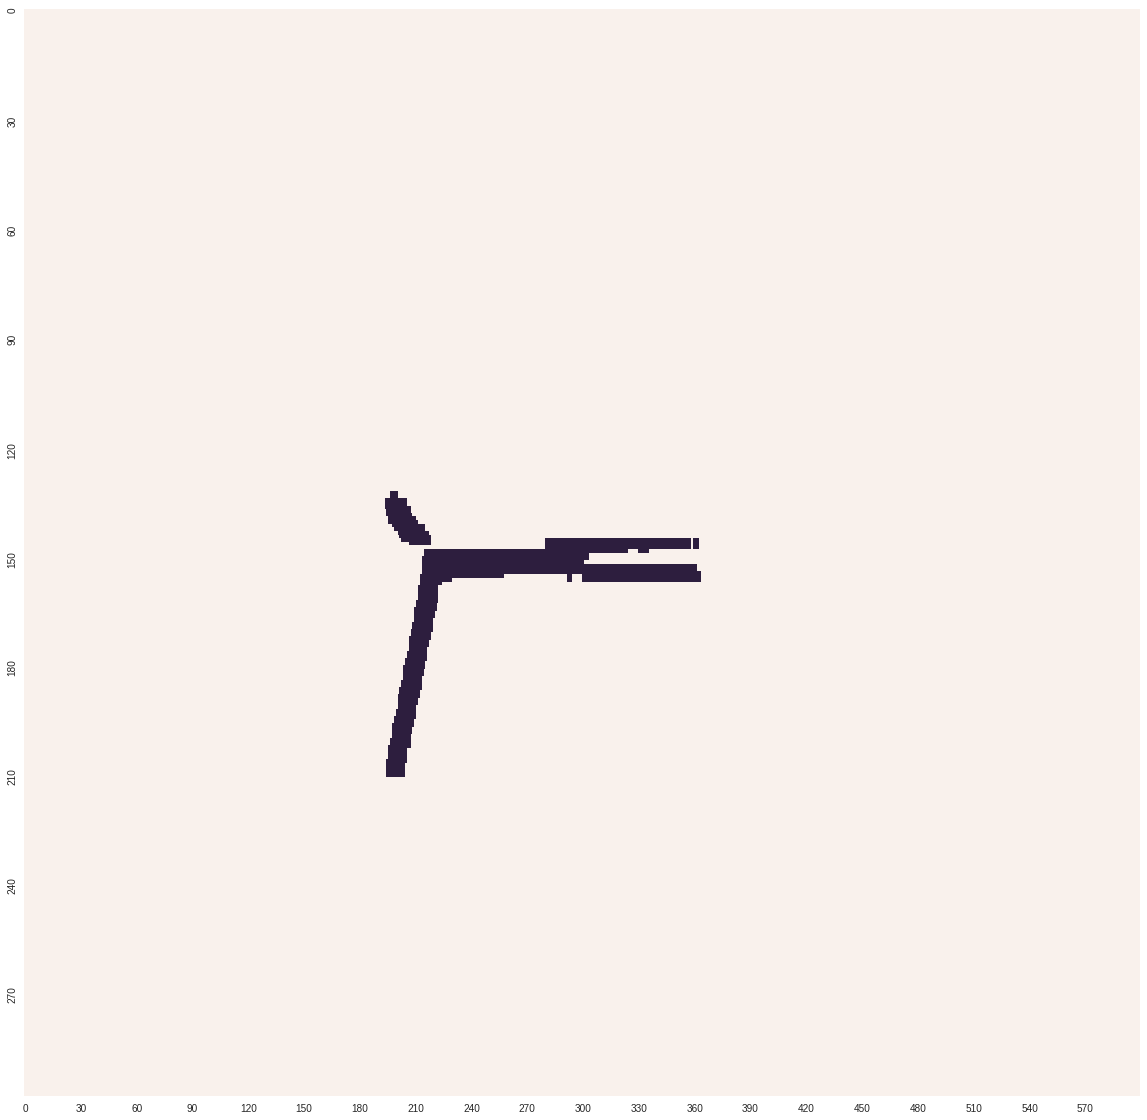

In [13]:

distance = []

for EID in dp.t3['EventID'].values:
    
    pic, images = dp.Process1(EID)
    plt.clf()
    sns.heatmap(pic[::-1], xticklabels=30, yticklabels=30)
    try:
        xv,yv,xc,yc = Process(pic, images)
        plt.scatter([xc],[yc])
        distance.append(((xc-xv)**2+(yc-yv)**2)**0.5)
    except:
        pass
    
    
    
    plt.savefig("{:04d}.jpg".format(EID))

(array([ 29.,  39.,  35.,  29.,  25.,  22.,  24.,  20.,  10.,  19.,  21.,
         22.,  22.,  15.,  10.,  18.,  10.,  17.,  15.,  17.,   9.,  13.,
         11.,   6.,   7.,  10.,   4.,   9.,   8.,   3.,   4.,   0.,   1.,
          3.,   3.,   2.,   2.,   2.,   3.,   1.,   2.,   4.,   0.,   0.,
          0.,   2.,   4.,   2.,   1.,   2.,   2.,   0.,   0.,   0.,   1.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([   2.71531052,    7.81273451,   12.91015849,   18.00758248,
          23.10500647,   28.20243045,   33.29985444,   38.39727843,
          43.49470241,   48.5921264 ,   53.68955039,   58.78697437,
          63.88439836,   68.98182235,   74.07924633,   79.17667032,
          84.27409431,   89.37151829,   94.468

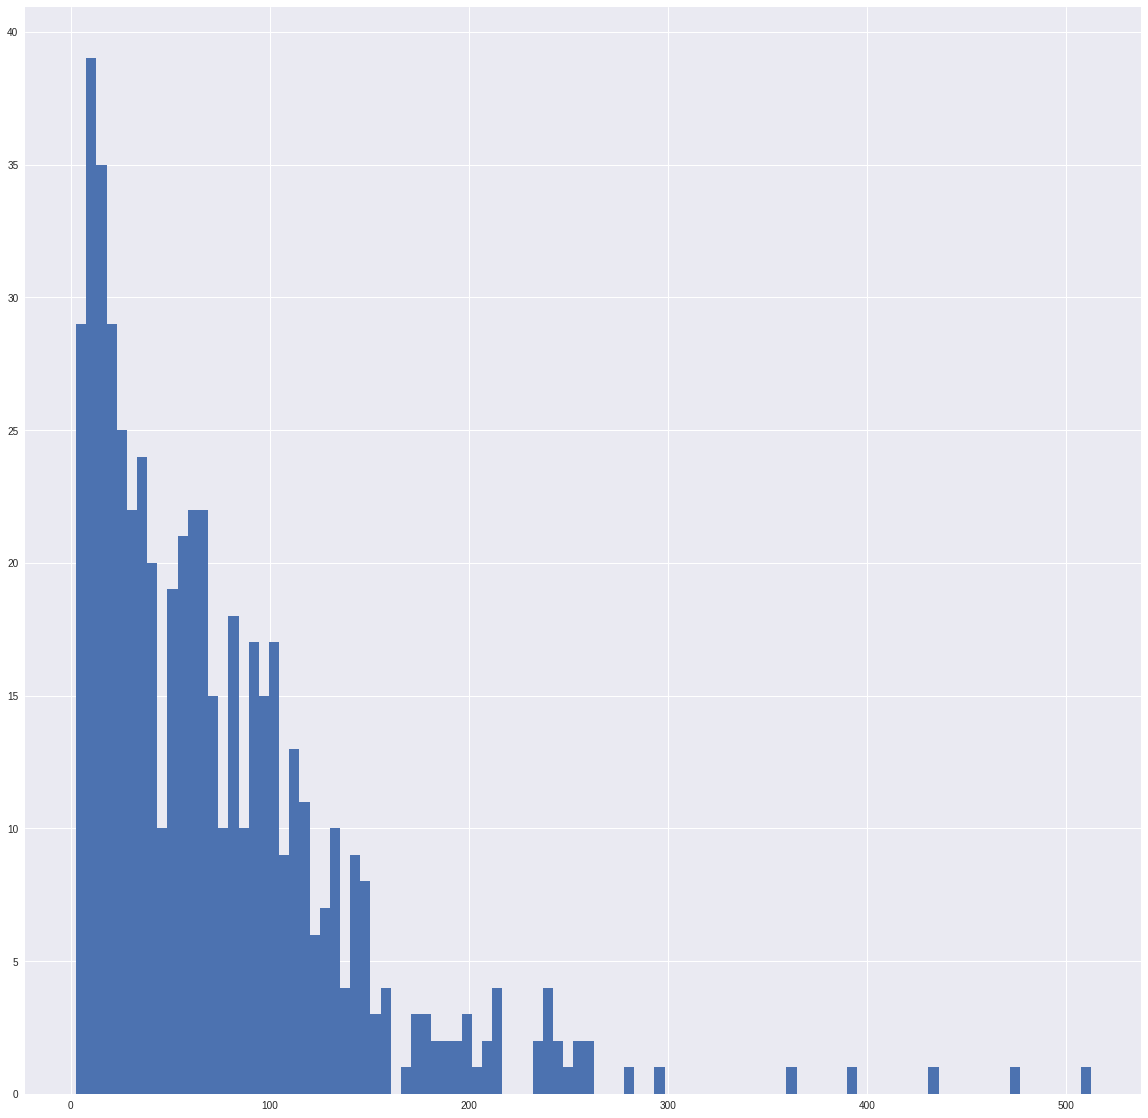

In [8]:
plt.hist(distance,bins=100)

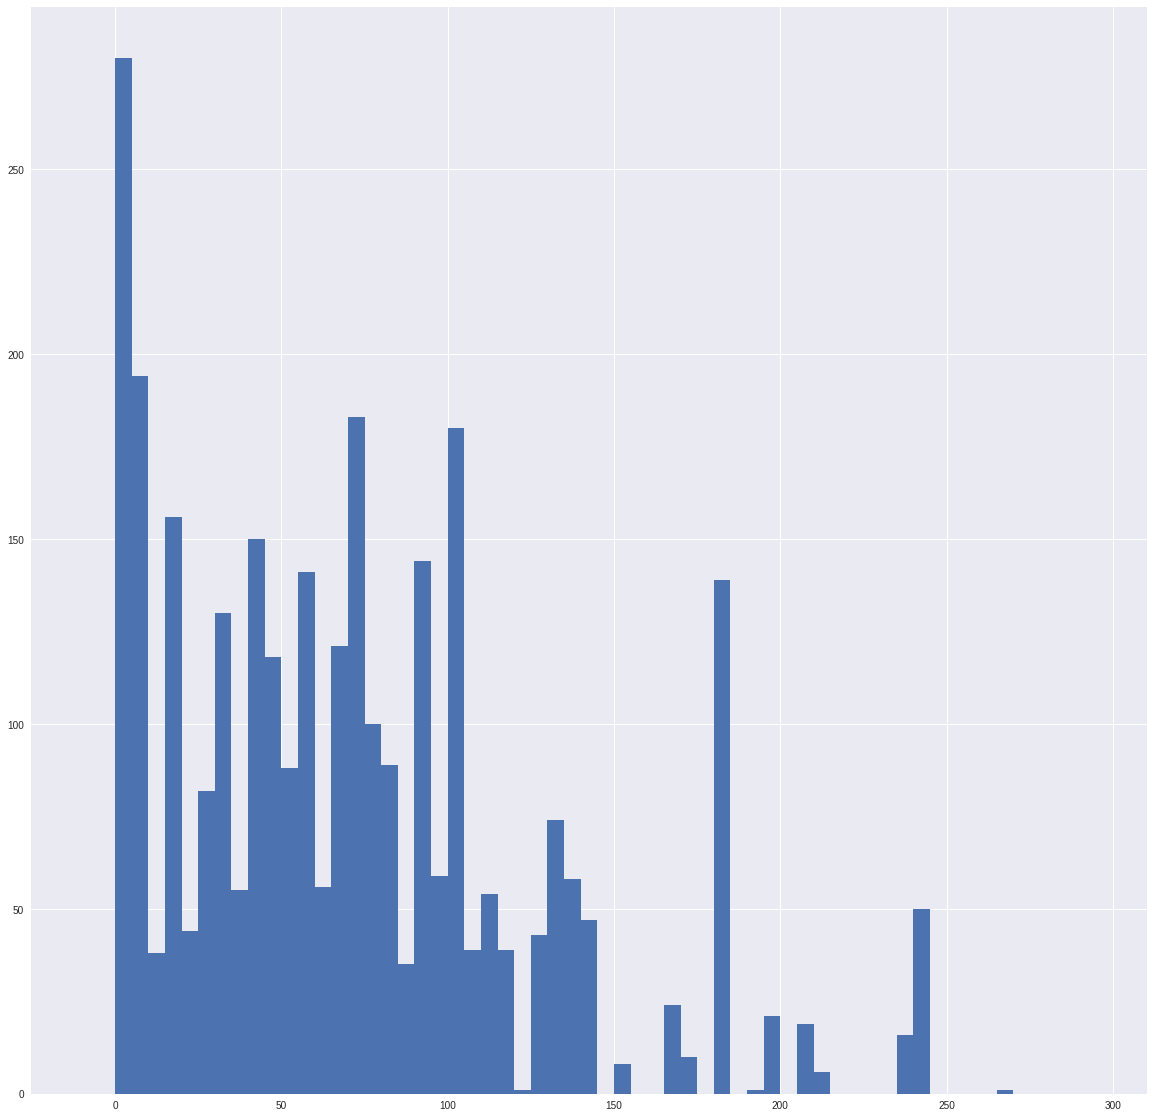

In [19]:
plt.hist(distance,bins=np.arange(-10,300,5));

In [11]:
pic, images = dp.Process1(9)

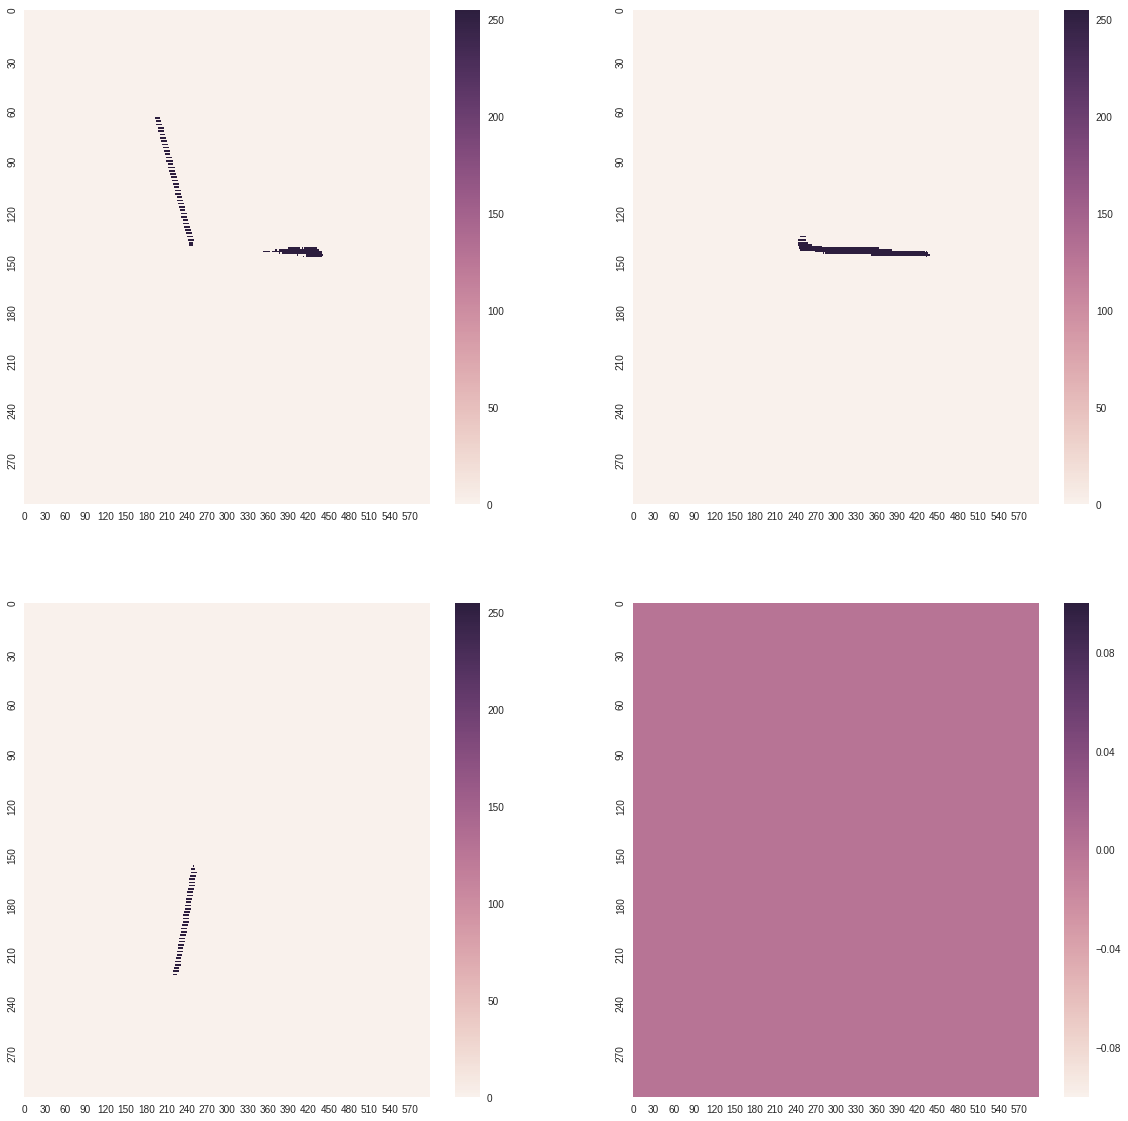

In [12]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.heatmap(images[0], xticklabels=30, yticklabels=30)
plt.subplot(222)
sns.heatmap(images[1], xticklabels=30, yticklabels=30)
plt.subplot(223)
sns.heatmap(images[2], xticklabels=30, yticklabels=30)
plt.subplot(224)
sns.heatmap(images[3], xticklabels=30, yticklabels=30)

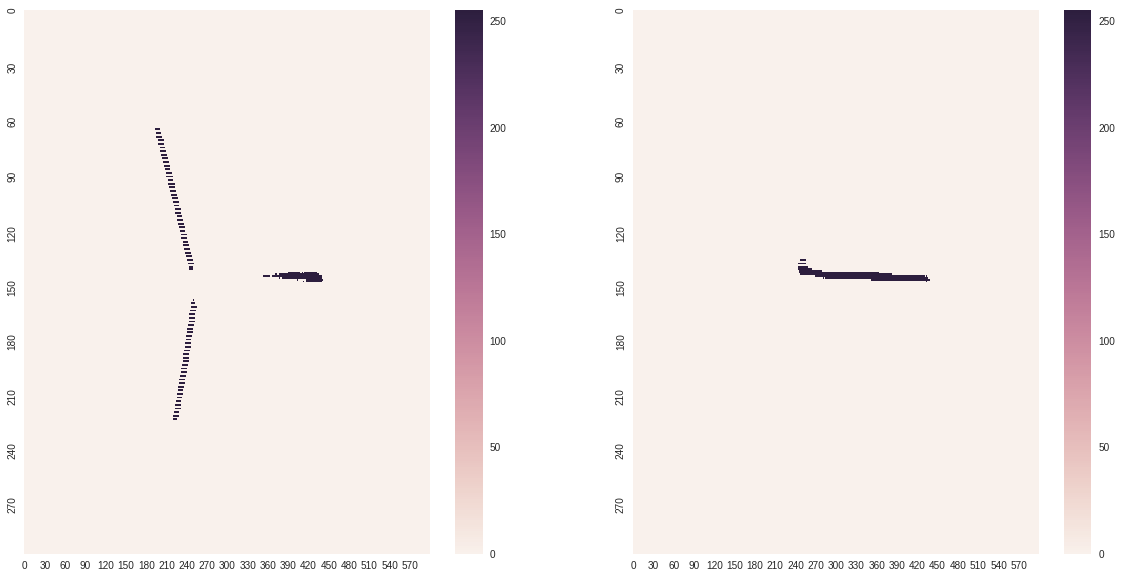

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.heatmap(images[0]+images[2], xticklabels=30, yticklabels=30)
plt.subplot(1,2,2)
sns.heatmap(images[1]+images[3], xticklabels=30, yticklabels=30)

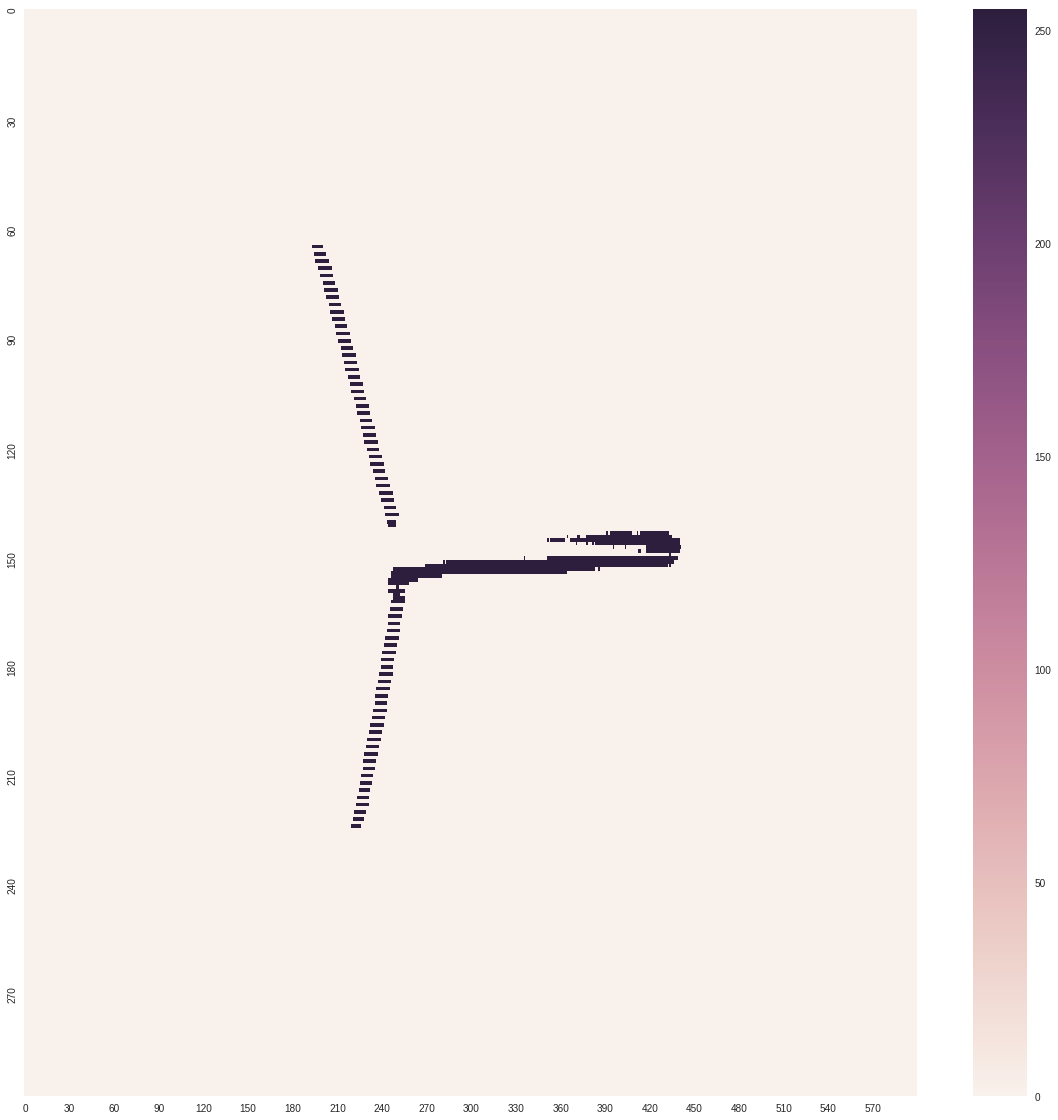

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(np.where(images[0]+images[2]+images[1][::-1]+images[3][::-1]>100,255,0), xticklabels=30, yticklabels=30)
